# 1. Problem Defition according to kaggle
>To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
>
>https://www.kaggle.com/competitions/spaceship-titanic/overview

# 2. Data
>The data is downloaded from the Kaggle Spaceship Titanic for competition and are in 'data' folder
>
>https://www.kaggle.com/competitions/spaceship-titanic/data
>
>there are 3 files :
>
>__train.csv__ - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
>
>__test.csv__ - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
>
>__sample_submission.csv__ - A submission file in the correct format.

# 3. Evaluation
>Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

# 4. Features
>__PassengerId__ - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
>
>__HomePlanet__ - The planet the passenger departed from, typically their planet of permanent residence.
>
>__CryoSleep__ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
>
>__Cabin__ - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
>
>__Destination__ - The planet the passenger will be debarking to.
>
>__Age__ - The age of the passenger.
>
>__VIP__ - Whether the passenger has paid for special VIP service during the voyage.
>
>__RoomService__, __FoodCourt__, __ShoppingMall__, __Spa__, __VRDeck__ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
>
>__Name__ - The first and last names of the passenger.
>
>__Transported__ - Whether the passenger was transported to another dimension. This is the __target__, the column you are trying to predict.



In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Import train set
df = pd.read_csv("../data/titanic-spaceship-transported-passengers-classification/train.csv")
# check first 5 rows of our df
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# check how many data are missing
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Drawing some plots to get a general idea of our data

In [5]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

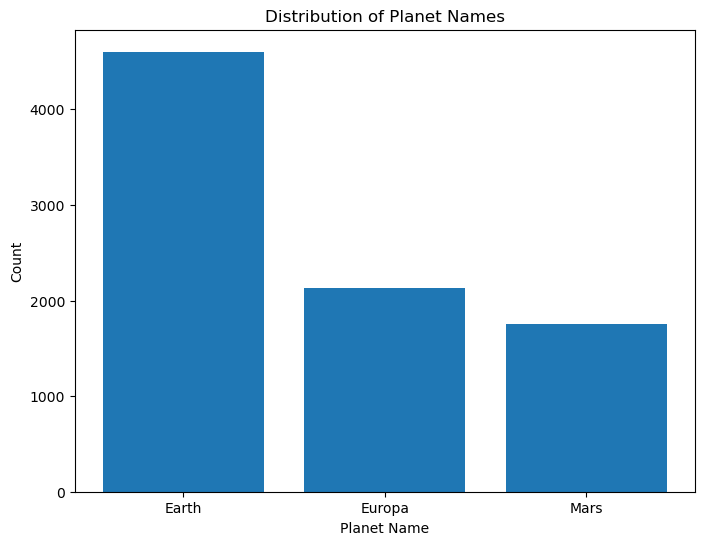

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
planet_counts = df['HomePlanet'].value_counts()

ax.bar(planet_counts.index, planet_counts.values)
ax.set(title="Distribution of Planet Names",
       xlabel='Planet Name',
       ylabel='Count')

plt.show()

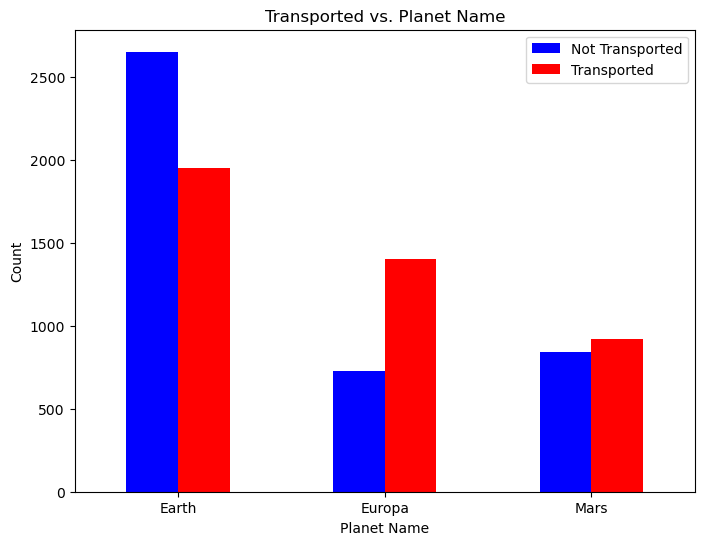

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
grouped_data = df.groupby('HomePlanet')['Transported'].value_counts().unstack()

grouped_data.plot(kind='bar', ax=ax, color=['blue', 'red'])

ax.set(title="Transported vs. Planet Name",
       xlabel='Planet Name',
       ylabel='Count')
plt.legend(['Not Transported', 'Transported'])
plt.xticks(rotation=0)
plt.show()

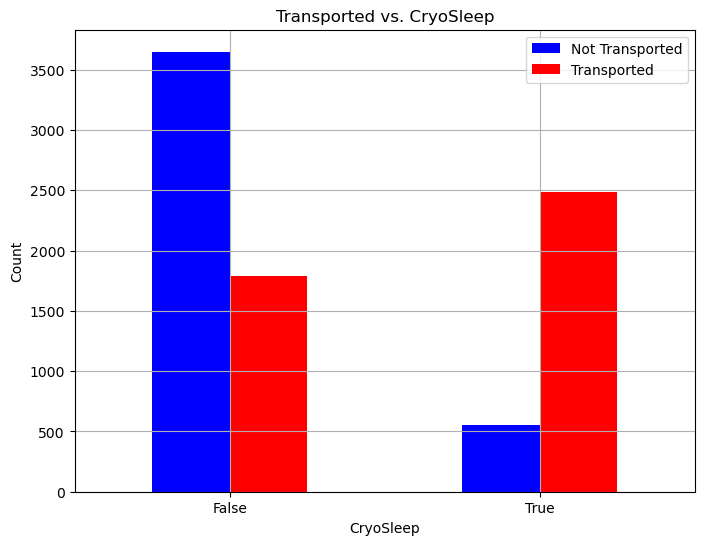

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
grouped_data = df.groupby('CryoSleep')['Transported'].value_counts().unstack()

grouped_data.plot(kind='bar', ax=ax, color=['blue', 'red'])

ax.set(title="Transported vs. CryoSleep",
       xlabel='CryoSleep',
       ylabel='Count')
plt.legend(['Not Transported', 'Transported'])
plt.grid()
plt.xticks(rotation=0)
plt.show()

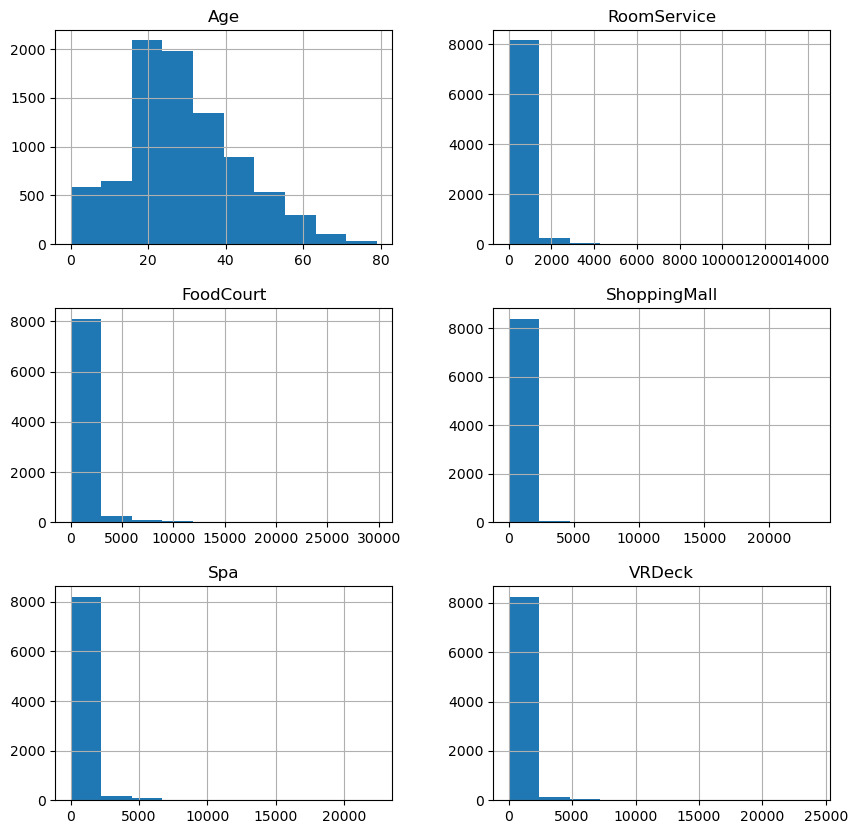

In [9]:
df.hist(figsize=(10,10));

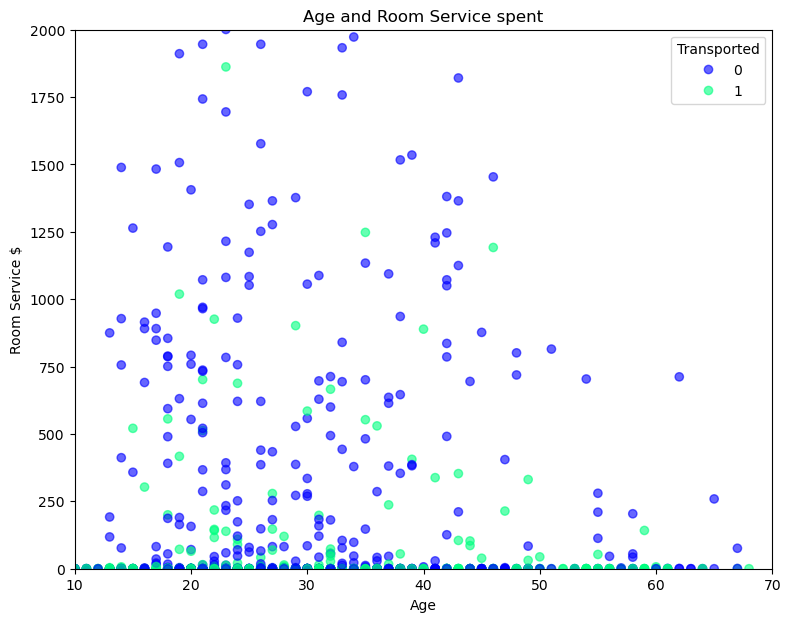

In [10]:
fig, ax = plt.subplots(figsize=(9,7))

scatter = ax.scatter(df.dropna()["Age"][:1000],
                     df.dropna()["RoomService"][:1000],
                     c=df.dropna()["Transported"][:1000],
                     cmap="winter",
                     alpha=0.6)

ax.set(title="Age and Room Service spent",
       xlabel="Age",
       ylabel="Room Service $")

ax.legend(*scatter.legend_elements(), title="Transported")
ax.set_ylim(bottom=0 ,top=2000)
ax.set_xlim(left=10 ,right=70)  

plt.show()

## Now we will create a function to preprocessing the data:
1. according to Features PassengerId is a combination of group and number in group so we will separate those
2. according to Features Cabin is a combination of deck/num/side so lets separate these too
3. changing Object columns with pandas category
4. filling numeric columns with median
5. filling non-numeric columns with pandas category code 0
6. add new columns so that we know if the value was orginaly missing

before creating the function described above lest do it step by step on a temparary data so we can check each step

In [11]:
# Creating a copy of our df just to be on the safe side
df_temp = df.copy()
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
# spliting passengerId into passenger group and passenger number in group
df_temp[['passengerGroup', 'passengerNumInGroup']] = df_temp['PassengerId'].str.split('_', expand=True)
df_temp.drop("PassengerId", axis=1, inplace=True)
df_temp.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,passengerNumInGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [13]:
# spliting Cabin into cabinDeck/cabinNum/cabinSide
df_temp[['cabinDeck', 'cabinNum', 'cabinSide']] = df_temp['Cabin'].str.split('/', expand=True)
df_temp.drop("Cabin", axis=1, inplace=True)
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,passengerNumInGroup,cabinDeck,cabinNum,cabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


## Now that we splited the columns we want lets change string columns to pandas category and fill missing values

In [14]:
df_temp.isna().sum()

HomePlanet             201
CryoSleep              217
Destination            182
Age                    179
VIP                    203
RoomService            181
FoodCourt              183
ShoppingMall           208
Spa                    183
VRDeck                 188
Name                   200
Transported              0
passengerGroup           0
passengerNumInGroup      0
cabinDeck              199
cabinNum               199
cabinSide              199
dtype: int64

In [15]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomePlanet           8492 non-null   object 
 1   CryoSleep            8476 non-null   object 
 2   Destination          8511 non-null   object 
 3   Age                  8514 non-null   float64
 4   VIP                  8490 non-null   object 
 5   RoomService          8512 non-null   float64
 6   FoodCourt            8510 non-null   float64
 7   ShoppingMall         8485 non-null   float64
 8   Spa                  8510 non-null   float64
 9   VRDeck               8505 non-null   float64
 10  Name                 8493 non-null   object 
 11  Transported          8693 non-null   bool   
 12  passengerGroup       8693 non-null   object 
 13  passengerNumInGroup  8693 non-null   object 
 14  cabinDeck            8494 non-null   object 
 15  cabinNum             8494 non-null   o

In [16]:
# changing all non numeric columns into pandas category
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [17]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   HomePlanet           8492 non-null   category
 1   CryoSleep            8476 non-null   category
 2   Destination          8511 non-null   category
 3   Age                  8514 non-null   float64 
 4   VIP                  8490 non-null   category
 5   RoomService          8512 non-null   float64 
 6   FoodCourt            8510 non-null   float64 
 7   ShoppingMall         8485 non-null   float64 
 8   Spa                  8510 non-null   float64 
 9   VRDeck               8505 non-null   float64 
 10  Name                 8493 non-null   category
 11  Transported          8693 non-null   bool    
 12  passengerGroup       8693 non-null   category
 13  passengerNumInGroup  8693 non-null   category
 14  cabinDeck            8494 non-null   category
 15  cabinNum             

In [18]:
# filling numerci rows with median and non numeric ones with category 0
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #adding a binary column which tells if the data was missing or not
            df_temp[label+"_is_missing"] = pd.isnull(content)
            #fill missing numeric value with median
            df_temp[label] = content.fillna(content.median())
    else:
        #adding a binary column which tells if the data was missing or not
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # we add +1 to change pandas missing code from -1 to 0
        df_temp[label] = pd.Categorical(content).codes+1

df_temp.isna().sum()

HomePlanet                        0
CryoSleep                         0
Destination                       0
Age                               0
VIP                               0
RoomService                       0
FoodCourt                         0
ShoppingMall                      0
Spa                               0
VRDeck                            0
Name                              0
Transported                       0
passengerGroup                    0
passengerNumInGroup               0
cabinDeck                         0
cabinNum                          0
cabinSide                         0
HomePlanet_is_missing             0
CryoSleep_is_missing              0
Destination_is_missing            0
Age_is_missing                    0
VIP_is_missing                    0
RoomService_is_missing            0
FoodCourt_is_missing              0
ShoppingMall_is_missing           0
Spa_is_missing                    0
VRDeck_is_missing                 0
Name_is_missing             

In [19]:
df_temp.head().T

,0,1,2,3,4
HomePlanet,2,1,2,2,1
CryoSleep,1,1,1,1,1
Destination,3,3,3,3,3
Age,39.0,24.0,58.0,33.0,16.0
VIP,1,1,2,1,1
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0
Spa,0.0,549.0,6715.0,3329.0,565.0
VRDeck,0.0,44.0,49.0,193.0,2.0


In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HomePlanet                      8693 non-null   int8   
 1   CryoSleep                       8693 non-null   int8   
 2   Destination                     8693 non-null   int8   
 3   Age                             8693 non-null   float64
 4   VIP                             8693 non-null   int8   
 5   RoomService                     8693 non-null   float64
 6   FoodCourt                       8693 non-null   float64
 7   ShoppingMall                    8693 non-null   float64
 8   Spa                             8693 non-null   float64
 9   VRDeck                          8693 non-null   float64
 10  Name                            8693 non-null   int16  
 11  Transported                     8693 non-null   bool   
 12  passengerGroup                  86

In [21]:
# creating a function to do above works 
def pre_df(df_temp):
    """
    this function will get a df and split PassengerId to passengerGroup and passengerNumIdGroup 
    and split Cabin into cabinDeck, cabinNum, cabinSide then drop PassengerId and Cabin
    after that change non numeric columns into pandas categori and then fills null values with
    either median for numeric values and 0 category code for pandas category values and return df
    """
    
    df_temp[['passengerGroup', 'passengerNumInGroup']] = df_temp['PassengerId'].str.split('_', expand=True)
    df_temp[['cabinDeck', 'cabinNum', 'cabinSide']] = df_temp['Cabin'].str.split('/', expand=True)
    df_temp.drop(["PassengerId", "Cabin"], axis=1, inplace=True)

    for label, content in df_temp.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_temp[label] = content.astype("category").cat.as_ordered()

    for label, content in df_temp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #adding a binary column which tells if the data was missing or not
                df_temp[label+"_is_missing"] = pd.isnull(content)
                #fill missing numeric value with median
                df_temp[label] = content.fillna(content.median())
        else:
            #adding a binary column which tells if the data was missing or not
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # we add +1 to change pandas missing code from -1 to 0
            df_temp[label] = pd.Categorical(content).codes+1

    return df_temp

In [22]:
#testing our function
df_second = pd.read_csv("../data/titanic-spaceship-transported-passengers-classification/train.csv")
df_second = pre_df(df_second)
df_second.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Name_is_missing,passengerGroup_is_missing,passengerNumInGroup_is_missing,cabinDeck_is_missing,cabinNum_is_missing,cabinSide_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


## now that all missing values are filled lets try correlation matrix and then one classification model just to see what happens

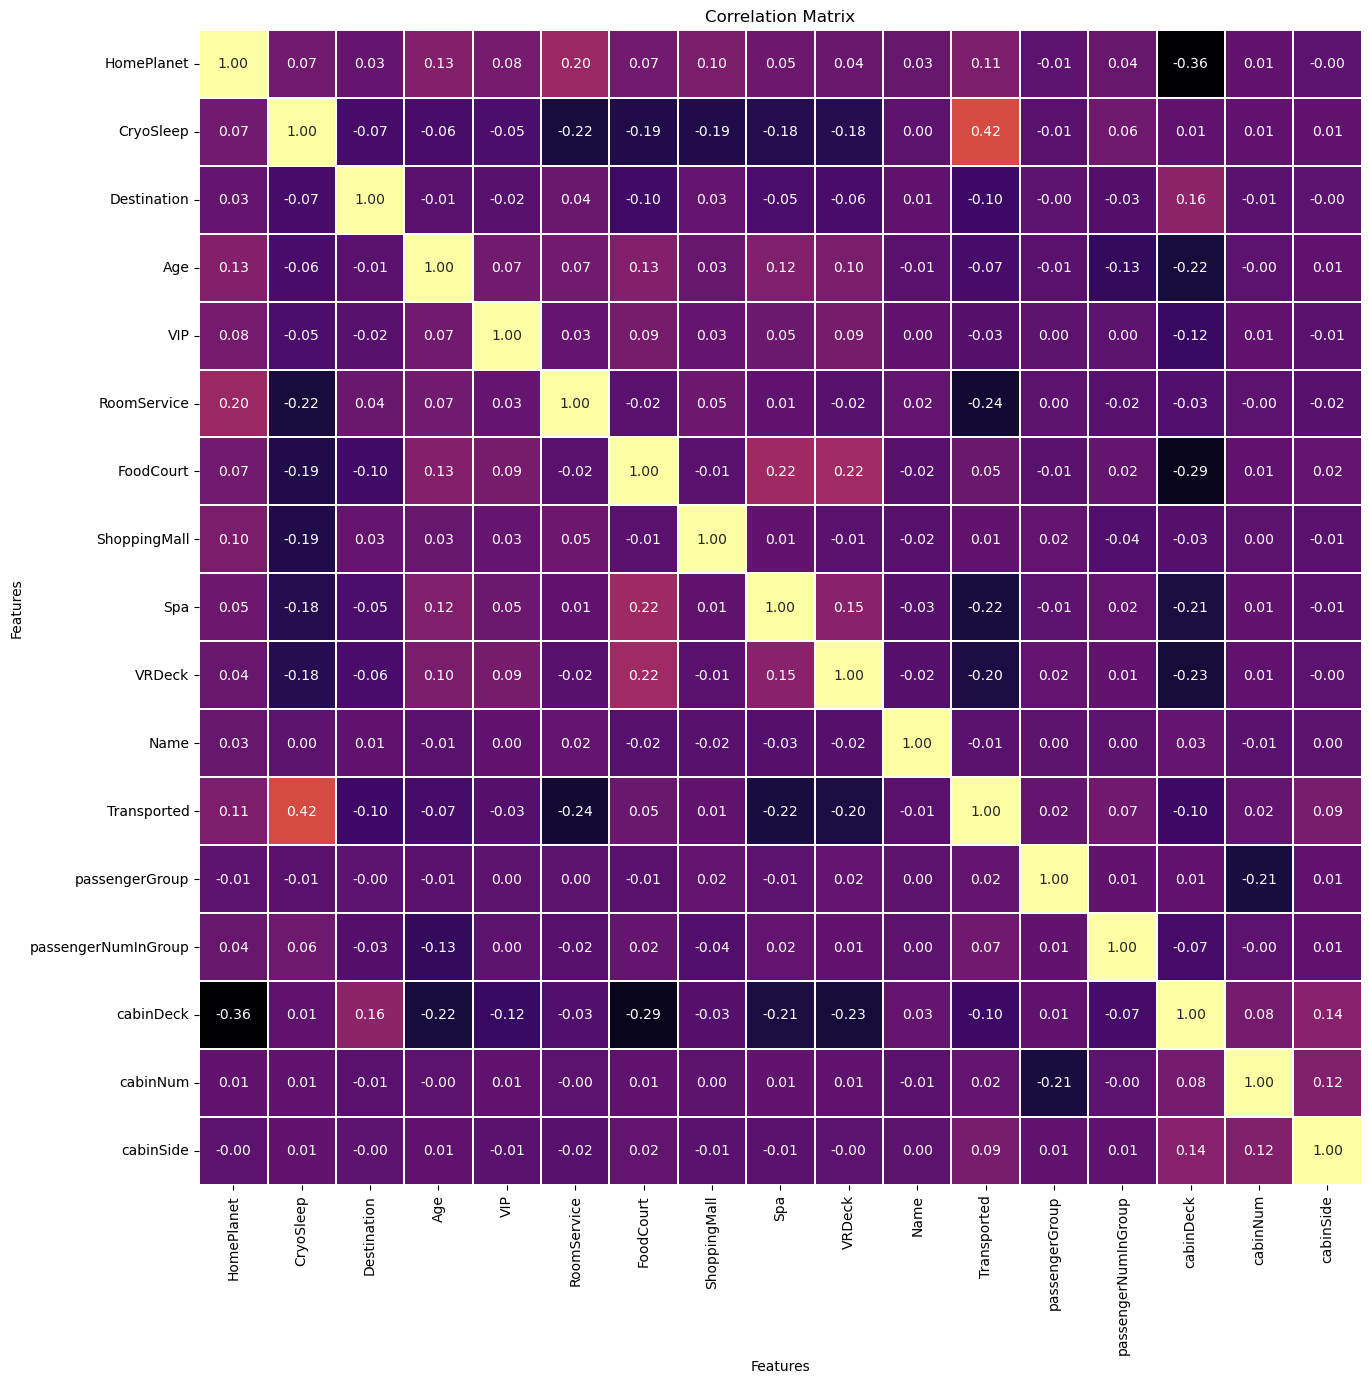

In [23]:

# Removing last 14 columns (these are the ones with _is_missing in them)
filtered_cols = df_temp.columns[:-16]

# Create a new DataFrame with filtered columns
temp_df_filtered = df_temp[filtered_cols]

# Creating correlation matrix
correlation_matrix = temp_df_filtered.corr()

# creating the heatmap
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 cbar=False,
                 linewidths=0.2,
                 cmap="inferno",
                 fmt=".2f")

plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

In [24]:
# seperatiin X and y sets
X = df_temp.drop("Transported", axis=1)
y = df_temp.Transported

In [25]:
# setting a random seed to be able to get same results later
np.random.seed(111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# testing random forest
clf = RandomForestClassifier(random_state=111)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7975848188614146

In [27]:
# checking accuracy score to be sure that it's the same as model.score
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.7975848188614146

so we got score of 0.797 with first model and no hyperparameter tuning and on 80% of training data

lets tune our model a bit before we check other models

## In blow sections i tried different GridSearch for finding the best hyperparameter , i commented them so they don't take our time when we try run all 

In [28]:
# %%time
# #since our data is only 8000 rows and we are in a competition we can go crazy here
# param_grid = {
#     'max_depth': [None, 3, 5, 10, 20],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': np.arange(1, 20, 3),
#     'min_samples_split': np.arange(2, 25, 3),
#     'n_estimators': np.arange(20, 140, 30)
# }
# rs_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,
#                                               random_state=111),
#                        param_grid = param_grid,
#                        n_jobs=-1,
#                        cv=3,
#                        verbose=True)
# rs_grid.fit(X_train, y_train)

In [29]:
# rs_grid.best_params_

In [30]:
# %%time
# #changing param_grid according to best_params_ and checking again
# param_grid = {
#     'min_samples_split': np.arange(2, 25, 1),
#     'n_estimators': np.arange(20, 200, 20)
# }
# rs_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,
#                                               random_state=111),
#                        param_grid = param_grid,
#                        n_jobs=-1,
#                        cv=3,
#                        verbose=True)
# rs_grid.fit(X_train, y_train)

In [31]:
# clf = RandomForestClassifier(min_samples_split=15,
#                              random_state=111)
# clf.fit(X_train, y_train),
# clf.score(X_test, y_test)

### got 0.7941 , slightly worse score than default parameters so commented the code above, lets try with randomizedcv

In [32]:
# %%time
# #since our data is only 8000 rows and we are in a competition we can go crazy here
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [None, 80, 90, 100, 110],
#     'max_features': [2, 3, 'sqrt'],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# rs_random = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
#                                               random_state=111),
#                                param_distributions=param_grid,
#                                n_iter=500,
#                                n_jobs=-1,
#                                cv=2,
#                                verbose=True)
# rs_random.fit(X_train, y_train)

In [33]:
# clf = RandomForestClassifier(min_samples_split=12,
#                              min_samples_leaf=3,
#                              n_estimators=100,
#                              max_depth=110,
#                              random_state=111)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

## again got 0.7947 still below default values

## no luck finding better hyperparameter lets try other models and tune them to see if they give better score

In [34]:
np.random.seed(111)
model_list = {
    "svc" : SVC(),
    "logisticRegression" : LogisticRegression(),
    "rfc" : RandomForestClassifier()
}

results = {}

for name, model in model_list.items():
    clf = model.fit(X_train, y_train)
    results[name] = clf.score(X_test, y_test)

results

F:\github-ml\ML-Experiments\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'svc': 0.7734330074755607,
 'logisticRegression': 0.7705577918343876,
 'rfc': 0.7964347326049454}

### highest score is Random forest model but just to be sure lets tune SVC and Logistig regression to see if we can get above 0.80 score

### before trying other models lets commit with this basic randomforest just to see what score we get

In [35]:
# using randomforestclassifier default parameters
clf = RandomForestClassifier()

# Fitting the model with entire train.csv
clf.fit(df_second.drop("Transported", axis=1), df["Transported"])


RandomForestClassifier()

In [36]:
# checking the score with default cv=5 
cross_val_score(clf, df_second.drop("Transported", axis=1), df["Transported"])

array([0.63772283, 0.74583094, 0.79758482, 0.8164557 , 0.74280783])

In [37]:
# Preparing our test data with pre_df function to fill null values and change Object dtypes to category
test_df = pd.read_csv("../data/titanic-spaceship-transported-passengers-classification/test.csv")

# Taking a copy of test_df before calling pre_df function to be able to use keep passengerId and orginal test df 
test_df_orginal = test_df.copy()

test_df = pre_df(test_df)

In [38]:
test_df.head().T

,0,1,2,3,4
HomePlanet,1,1,2,2,1
CryoSleep,2,1,2,1,1
Destination,3,3,1,3,3
Age,27.0,19.0,31.0,38.0,20.0
VIP,1,1,1,1,1
RoomService,0.0,0.0,0.0,0.0,10.0
FoodCourt,0.0,9.0,0.0,6652.0,0.0
ShoppingMall,0.0,0.0,0.0,0.0,635.0
Spa,0.0,2823.0,0.0,181.0,0.0
VRDeck,0.0,0.0,0.0,585.0,0.0


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HomePlanet                      4277 non-null   int8   
 1   CryoSleep                       4277 non-null   int8   
 2   Destination                     4277 non-null   int8   
 3   Age                             4277 non-null   float64
 4   VIP                             4277 non-null   int8   
 5   RoomService                     4277 non-null   float64
 6   FoodCourt                       4277 non-null   float64
 7   ShoppingMall                    4277 non-null   float64
 8   Spa                             4277 non-null   float64
 9   VRDeck                          4277 non-null   float64
 10  Name                            4277 non-null   int16  
 11  passengerGroup                  4277 non-null   int16  
 12  passengerNumInGroup             42

In [40]:
# predicting values with our model on test data
y_preds = clf.predict(test_df)

In [41]:
# checking the format of sample file
sample_df = pd.read_csv("../data/titanic-spaceship-transported-passengers-classification/sample_submission.csv")
sample_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [42]:
final_df = pd.DataFrame()
final_df["PassengerId"] = test_df_orginal["PassengerId"]
final_df["Transported"] = y_preds
final_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [43]:
final_df.to_csv("../data/titanic-spaceship-transported-passengers-classification/spaceship_preds_1.csv", index=False)

# this was the first entiry that i put on kaggle and got score of 0.79120 and ranked 866/1559

## lets scale out numeric features before moving to other models

In [44]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Name_is_missing,passengerGroup_is_missing,passengerNumInGroup_is_missing,cabinDeck_is_missing,cabinNum_is_missing,cabinSide_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df_temp.head().T

,0,1,2,3,4
HomePlanet,2,1,2,2,1
CryoSleep,1,1,1,1,1
Destination,3,3,3,3,3
Age,39.0,24.0,58.0,33.0,16.0
VIP,1,1,2,1,1
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0
Spa,0.0,549.0,6715.0,3329.0,565.0
VRDeck,0.0,44.0,49.0,193.0,2.0


In [46]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HomePlanet                      8693 non-null   int8   
 1   CryoSleep                       8693 non-null   int8   
 2   Destination                     8693 non-null   int8   
 3   Age                             8693 non-null   float64
 4   VIP                             8693 non-null   int8   
 5   RoomService                     8693 non-null   float64
 6   FoodCourt                       8693 non-null   float64
 7   ShoppingMall                    8693 non-null   float64
 8   Spa                             8693 non-null   float64
 9   VRDeck                          8693 non-null   float64
 10  Name                            8693 non-null   int16  
 11  Transported                     8693 non-null   bool   
 12  passengerGroup                  86

In [47]:
# Creating a function to scale our numeric values
def standard_scaler_func(df_temp):
    """
    this function use StandardScaler to make numeric values standard
    """
    scaler = StandardScaler()
    num_cols = df_temp.select_dtypes(include='number').columns.tolist()
    scaler.fit(df_temp[num_cols])
    df_temp[num_cols] = scaler.transform(df_temp[num_cols])
    return df_temp

In [48]:
# Trying our function on df_temp
df_temp = standard_scaler_func(df_temp)
df_temp.head().T

,0,1,2,3,4
HomePlanet,0.451063,-0.757285,0.451063,0.451063,-0.757285
CryoSleep,-0.625361,-0.625361,-0.625361,-0.625361,-0.625361
Destination,0.641629,0.641629,0.641629,0.641629,0.641629
Age,0.711945,-0.334037,2.036857,0.293552,-0.891895
VIP,0.00214,0.00214,4.652352,0.00214,0.00214
RoomService,-0.333105,-0.168073,-0.268001,-0.333105,0.125652
FoodCourt,-0.281027,-0.275387,1.959998,0.52301,-0.237159
ShoppingMall,-0.283579,-0.241771,-0.283579,0.336851,-0.031059
Spa,-0.270626,0.217158,5.695623,2.687176,0.231374
VRDeck,-0.263003,-0.224205,-0.219796,-0.092818,-0.26124


### now that our data is scaled lets try some models

In [49]:
# although Random Forest dosn't really need scaling but lets try it again
model = RandomForestClassifier(random_state=111)
cross_score = cross_val_score(model, df_temp.drop("Transported", axis=1), df_temp["Transported"], cv=5)
cross_score, cross_score.mean()

(array([0.63657274, 0.74295572, 0.78953422, 0.81530495, 0.74280783]),
 0.7454350906007248)

In [50]:
# trying SVC to check if we get better score
model = SVC(random_state=111)
cross_score = cross_val_score(model, df_temp.drop("Transported", axis=1), df_temp["Transported"], cv=5)
cross_score, cross_score.mean()

(array([0.76768258, 0.79643473, 0.80276021, 0.80667434, 0.80034522]),
 0.7947794157058903)

In [51]:
# trying logistic regrission
model = LogisticRegression(random_state=111)
cross_score = cross_val_score(model, df_temp.drop("Transported", axis=1), df_temp["Transported"], cv=5)
cross_score, cross_score.mean()

(array([0.77055779, 0.786659  , 0.79183439, 0.7853855 , 0.7853855 ]),
 0.783964435997832)

### since SVC got higher score here lets try and tune its hyperparameter

In [52]:
# %%time

# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'degree': [1,2,3,4,5,6],
#               'kernel': ['rbf']}
# svc_grid = GridSearchCV(SVC(random_state=111),
#                         param_grid=param_grid,
#                         n_jobs=-1,
#                         verbose=3)
# svc_grid.fit(df_temp.drop("Transported", axis=1), df_temp["Transported"])

## best parameters found is : C=10, gamma=0.01, degree=1
## i commented this section in case i want to rerun it using run all cells

In [53]:
# rewriting svc model using best parameter that we found:
model = SVC(C=10,
            gamma=0.01,
            degree=1,
            random_state=111)
cross_score = cross_val_score(model, df_temp.drop("Transported", axis=1), df_temp["Transported"], cv=5)
cross_score, cross_score.mean()

(array([0.77400805, 0.79528465, 0.80563542, 0.80379747, 0.79286536]),
 0.7943181900898033)

we got 0.001 more score than before , lets try it on our test data and make a second entry to check if it get us better score and rank in kaggle

In [54]:
# Fittin our model 
model = SVC(C=10,
            gamma=0.01,
            degree=1,
            random_state=111)
model.fit(df_temp.drop("Transported", axis=1), df_temp["Transported"])

# Loading test file to predict on it
test_df = pd.read_csv("../data/titanic-spaceship-transported-passengers-classification/test.csv")

# Creating a copy of our test data so we can have the orginal ID of passengers
orginal_test = test_df.copy()

# Using our functions to split some columns and fill empty data and scale it
test_df = pre_df(test_df)
test_df = standard_scaler_func(test_df)

# Creating y_preds
y_preds = model.predict(test_df)

In [55]:
# Creating an empty dataframe and fill it with passengerid and our prediction
final_df = pd.DataFrame()
final_df["PassengerId"] = orginal_test["PassengerId"]
final_df["Transported"] = y_preds
final_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [56]:
# Saving our new prediction df into a csv file to upload onto kaggle
final_df.to_csv("../data/titanic-spaceship-transported-passengers-classification/spaceship_preds_2.csv", index=False)

## Final note:
>in this second entry to Titanic spaceship competition i got the score of __0.80102__ so its slightly better than last one , and got the ranking of __375/1602__
>
>since this is just a training i'm gonna move on to next competition.

# Now lets draw ROC Curve and Confusion matrix and some other evaluations

> since this is a competition in kaggle and we dont have test.csv labels we create our model again and devide out train.csv to test and train sets

In [57]:
df_temp.head().T

,0,1,2,3,4
HomePlanet,0.451063,-0.757285,0.451063,0.451063,-0.757285
CryoSleep,-0.625361,-0.625361,-0.625361,-0.625361,-0.625361
Destination,0.641629,0.641629,0.641629,0.641629,0.641629
Age,0.711945,-0.334037,2.036857,0.293552,-0.891895
VIP,0.00214,0.00214,4.652352,0.00214,0.00214
RoomService,-0.333105,-0.168073,-0.268001,-0.333105,0.125652
FoodCourt,-0.281027,-0.275387,1.959998,0.52301,-0.237159
ShoppingMall,-0.283579,-0.241771,-0.283579,0.336851,-0.031059
Spa,-0.270626,0.217158,5.695623,2.687176,0.231374
VRDeck,-0.263003,-0.224205,-0.219796,-0.092818,-0.26124


In [58]:
np.random.seed(111)
X_train, X_test, y_train, y_test = train_test_split(df_temp.drop("Transported", axis=1), df_temp["Transported"], test_size=0.2)

clf = SVC(C=10,
            gamma=0.01,
            degree=1)

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.7906843013225991

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.81      0.76      0.78       871
        True       0.77      0.82      0.80       868

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [61]:
print(f"Precision Score is {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall Score is {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1 Score is {f1_score(y_test, y_preds)*100:.2f}%")
print(f"Accuracy Score is {accuracy_score(y_test, y_preds)*100:.2f}%")

Precision Score is 77.45%
Recall Score is 81.91%
F1 Score is 79.62%
Accuracy Score is 79.07%


In [62]:
conf_matrix = confusion_matrix(y_test, y_preds)

Text(8.222222222222223, 0.5, 'predicted label')

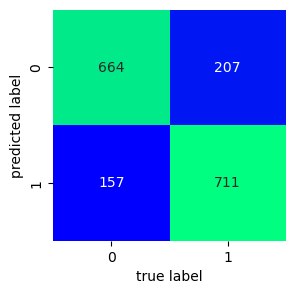

In [63]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(conf_matrix,
                 annot=True, # Annotate the boxes
                 cbar=False,
                 fmt='d',
                 cmap="winter")
plt.xlabel("true label")
plt.ylabel("predicted label")

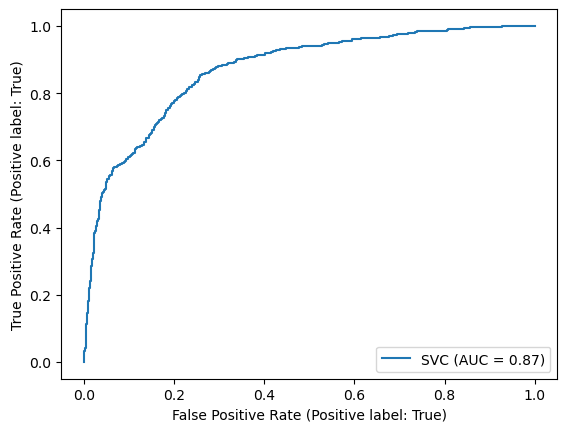

In [64]:
RocCurveDisplay.from_estimator(estimator=clf, 
                               X=X_test, 
                               y=y_test); 